In [45]:
!pip install wget

In [46]:
import os
from nltk.tokenize import *
from nltk.stem import *
import re
from pathlib import Path
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import random
import wget
random.seed()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
filename = wget.download("https://github.com/MIE451-1513-2019/course-datasets/raw/master/20_newsgroups.zip", "20_newsgroups.zip")
!unzip 20_newsgroups.zip
DATA_DIR = "20_newsgroups"

Streaming output truncated to the last 5000 lines.
  inflating: 20_newsgroups/sci.electronics/53948  
  inflating: 20_newsgroups/sci.electronics/54351  
  inflating: 20_newsgroups/talk.politics.guns/54118  
  inflating: 20_newsgroups/talk.politics.guns/54588  
  inflating: 20_newsgroups/talk.politics.guns/54127  
  inflating: 20_newsgroups/talk.politics.guns/53302  
  inflating: 20_newsgroups/talk.politics.guns/54315  
  inflating: 20_newsgroups/talk.politics.guns/54771  
  inflating: 20_newsgroups/talk.politics.guns/54543  
  inflating: 20_newsgroups/talk.politics.guns/55233  
  inflating: 20_newsgroups/talk.politics.guns/55039  
  inflating: 20_newsgroups/talk.politics.guns/54749  
  inflating: 20_newsgroups/talk.politics.guns/55234  
  inflating: 20_newsgroups/talk.politics.guns/54782  
  inflating: 20_newsgroups/talk.politics.guns/54544  
  inflating: 20_newsgroups/talk.politics.guns/54312  
  inflating: 20_newsgroups/talk.politics.guns/54120  
  inflating: 20_newsgroups/talk.polit

## Functions from lab

In [47]:
def clean_file_text(text):
    new_text = re.sub("Newsgroups:.*?\n", "", text)
    new_text = re.sub("Xref:.*?\n", "", new_text)
    new_text = re.sub("Path:.*?\n", "", new_text)
    new_text = re.sub("Date:.*?\n", "", new_text)
    new_text = re.sub("Followup-To:.*?\n", "", new_text)
    return new_text

In [48]:
def corpus_count_words(file_list):
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            word_counter.update(file_words)
    return word_counter

In [49]:
def get_topic_name(file_path):
    return file_path.parent.name

def get_target(topic_name):
    topics = ['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 
     'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 
     'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics',
     'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc']
    return topics.index(topic_name)

In [50]:
def plot_confusion_matrix(cm):
    # plot the confusion matrix
    plt.figure(figsize=(10,10))
    plt.matshow(cm, fignum=1)
    
    # add labels for all targets
    num_targets = cm.shape[0]
    plt.xticks(list(range(num_targets+1)))
    plt.yticks(list(range(num_targets+1)))

## Q1

In [38]:
all_files = [pth for pth in Path(DATA_DIR).glob("**/*") if pth.is_file() and not pth.name.startswith(".")]

In [39]:
def binary_baseline_data(file_list, num_words = 1000):
    # Calculate word count in corpus
    news_cnt = corpus_count_words(file_list)
    
    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    
    # Create a binary encoding of dataset based on the selected features (X)
    tokenizer = RegexpTokenizer(r'\w+')
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            df_rows.append([1 if word in file_words else 0 for word in word_list])      
    X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)
    
    # Create a dataframe of targets (y)
    y = [get_target(get_topic_name(file_path)) for file_path in file_list]
    
    return X, y

In [40]:
# get the baseline data
X, y = binary_baseline_data(all_files)

# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a logistic regression classifier
clf = LogisticRegression(C=1.0).fit(X_train, y_train)

# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.9482031863970851
Test accuracy: 0.674


In [26]:
print(X_train)

                                              the  to  ...  recently  Summary
20_newsgroups/rec.autos/103147                  1   1  ...         0        0
20_newsgroups/misc.forsale/76624                1   0  ...         0        1
20_newsgroups/rec.sport.hockey/53777            1   1  ...         0        0
20_newsgroups/sci.med/59425                     1   1  ...         0        0
20_newsgroups/talk.religion.misc/83559          1   1  ...         0        0
...                                           ...  ..  ...       ...      ...
20_newsgroups/comp.sys.ibm.pc.hardware/61146    1   1  ...         0        0
20_newsgroups/comp.sys.ibm.pc.hardware/60458    1   1  ...         0        0
20_newsgroups/soc.religion.christian/21613      1   1  ...         0        0
20_newsgroups/rec.sport.baseball/104991         1   1  ...         0        0
20_newsgroups/talk.politics.mideast/76316       1   1  ...         0        0

[13997 rows x 1000 columns]


### Q1 (a)
One thousand most common words in the dataset was selected as the feature set.
In total, 19997 files were used.Yet the training set took 70% of the 1997 files
and the testing set took the remaining 30% of it. Therefore there were 6000 files(rows) used for testing and 13997 rows for training. Hyperparameters in the baseline model inclusdes the Inverse of regularization strength C, test size, and number of random state which determines the random seed. Since we choosen 42, we are able to reproduce any result we have.

### Q1 (b)

Modify the following function:

In [109]:
all_files = [pth for pth in Path(DATA_DIR).glob("**/*") if pth.is_file() and not pth.name.startswith(".")]

In [110]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()
def corpus_count_words_filtered(file_list):
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data.lower())
            file_words = tokenizer.tokenize(file_data)
            file_words = [wordnet_lemmatizer.lemmatize(word) for word in file_words if not word in stop_words]
            word_counter.update(file_words)
    return word_counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
def binary_improved_data(file_list, num_words = 1000):
    # Put your code here
    # Make sure you update the variable features and targets below
    #wordnet_lemmatizer = WordNetLemmatizer()
    #stemmer = LancasterStemmer()
    # Calculate word count in corpus
    #news_cnt = corpus_count_words(file_list)
    news_cnt=corpus_count_words_filtered(file_list)
    nltk.download('stopwords')
    stop_words=set(stopwords.words('english'))
    tokenizer = RegexpTokenizer(r'\w+')
    wordnet_lemmatizer = WordNetLemmatizer()
    
    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    
    # Create a binary encoding of dataset based on the selected features (X)
    #tokenizer = RegexpTokenizer(r'\w+')
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data.lower())
            file_words = tokenizer.tokenize(file_data)
            file_words = [wordnet_lemmatizer.lemmatize(word) for word in file_words if not word in stop_words]
            #file_words = tokenizer.tokenize(file_data)
            #stop_words = set(stopwords.words('english'))
            #for word in file_words:
              #if word not in stop_words:
                #word1 = stemmer.stem(word)
                 #word2=wordnet_lemmatizer.lemmatize(word)
            
            df_rows.append([1 if word in file_words else 0 for word in word_list])      
    X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)
    
    # Create a dataframe of targets (y)
    y = [get_target(get_topic_name(file_path)) for file_path in file_list]
    

    #Please remember to put index for your dataframe as the file name
    #For example: pd.DataFrame(data, index=[str(f) for f in file_list],columns=[])
    
    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y

### Q1 (c)

Modify the following partial code to calculate the train and test accuracy and answer the question in the markdown cell below

In [112]:
# get the baseline data
X,y = binary_improved_data(all_files)


# Write your code here:
# You need to split the data and train a logistic regression classifier.
# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a logistic regression classifier
clf = LogisticRegression(C=1).fit(X_train, y_train)

# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)



# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Train accuracy: 0.9819246981496035
Test accuracy: 0.9416666666666667


In [117]:
print(X_test)

                                             edu  ax  c  ...  pat  worth  shall
20_newsgroups/misc.forsale/76510               1   0  1  ...    0      0      0
20_newsgroups/talk.politics.misc/178506        1   0  1  ...    0      0      0
20_newsgroups/rec.motorcycles/103216           1   0  1  ...    0      0      0
20_newsgroups/rec.motorcycles/104804           1   0  1  ...    0      0      0
20_newsgroups/rec.sport.hockey/53796           1   0  1  ...    0      0      0
...                                          ...  .. ..  ...  ...    ...    ...
20_newsgroups/talk.politics.mideast/77361      1   0  1  ...    0      0      0
20_newsgroups/comp.os.ms-windows.misc/9539     1   0  1  ...    0      0      0
20_newsgroups/comp.sys.mac.hardware/51601      1   0  1  ...    0      0      0
20_newsgroups/alt.atheism/54251                1   0  1  ...    0      0      0
20_newsgroups/comp.os.ms-windows.misc/10859    1   0  1  ...    0      0      0

[6000 rows x 1000 columns]


Result has improved significantly from 0.68 to 0.94 meaning our baseline system has been improved.

### Q1 (d)

Modify the partial code below

In [113]:
def random_mean_ci(X, y, num_tests):
    # train_results is a list of train accuracy results for the differrent random splits of the dataset
    train_results = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results = []
    
    # Write your code here
    #X,y = binary_improved_data(all_files)
    #X, y = binary_baseline_data(all_files)
    for i in range(num_tests):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,1000))
      # train a logistic regression classifier
      clf = LogisticRegression(C=1.0).fit(X_train, y_train)

      # predict on train and test set
      y_train_predict = clf.predict(X_train)
      y_test_predict = clf.predict(X_test)

      # calculate train and test accuracy
      train_accuracy = accuracy_score(y_train, y_train_predict)
      test_accuracy = accuracy_score(y_test, y_test_predict)
      train_results.append(train_accuracy)
      test_results.append(test_accuracy)

    
    # calculate the train mean and the 95% confidence interval for the list of results
    train_mean = np.mean(train_results)
    train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean = np.mean(test_results)
    test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))
    
    # validate return types
    assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
    assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"
    
    return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

### Q1 (e)

Use the following code to calculate the mean accuracy and 95% confidence interval over 10 random splits

In [114]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.981195970565121
Train confidence interval over 10 random splits: [0.9806947542714793, 0.9816971868587626]
Test mean accuracy over 10 random splits: 0.9460333333333335
Test confidence interval over 10 random splits: [0.944956917864238, 0.947109748802429]


Both mean train accuracy and test accuracy are very closed to what we had in part c. Hence, our 95% confidence interval indicates that we are 95% percent sure that the true means will fall into the intervals. Running 10 tests has yielded a more general, informative result than just one test.

### Q1 (f)

Modify the partial code below

In [75]:
def random_cm(X, y, num_tests):
    # cm_list is a list of confusion matrices for the different random splits of the dataset
    cm_list = []
    
    # Write your code here
    X,y = binary_improved_data(all_files) 
    #X, y = binary_baseline_data(all_files)
    for i in range(num_tests):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,1000))
      # train a logistic regression classifier
      clf = LogisticRegression(C=1.0).fit(X_train, y_train)

      # predict on train and test set
      y_train_predict = clf.predict(X_train)
      y_test_predict = clf.predict(X_test)
      cm=confusion_matrix(y_test, y_test_predict)
      cm_list.append(cm)

    # sum the confusion matrices and return the combined confusion matrix
    combined_cm = np.array(cm_list).sum(axis=0)

    # validate return type
    assert isinstance(combined_cm, np.ndarray), "return type"
    
    return combined_cm

### Q1 (g)

Use the following code to produce a confusion matrix for 10 random splits

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


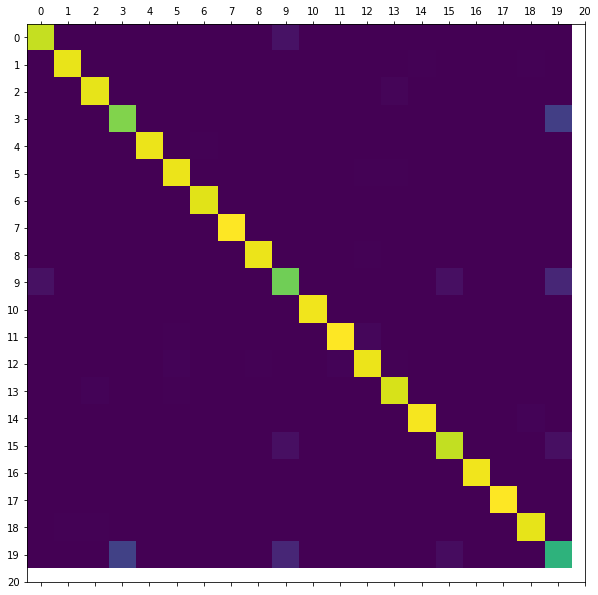

In [76]:
cm10 = random_cm(X, y, num_tests = 10)
plot_confusion_matrix(cm10)

In [77]:
pd.DataFrame(cm10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2778,0,0,0,0,0,0,0,0,144,0,0,0,0,0,6,0,0,0,1
1,0,2946,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,22,0
2,0,0,2925,0,0,4,0,0,0,0,0,4,2,46,3,0,0,0,5,0
3,0,0,0,2461,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,559
4,0,0,0,0,2951,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,2956,0,0,0,0,0,4,14,18,0,0,0,0,0,0
6,0,0,0,0,1,0,2906,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,3,0,3038,4,0,0,0,4,0,1,8,5,0,0,0
8,0,0,0,1,0,0,0,0,2950,0,0,4,16,0,2,0,7,0,0,0
9,137,0,0,0,0,0,0,0,1,2387,0,0,0,0,0,129,3,0,0,330


Yes, Topic 20 is more easily confused with topic 4 as there were 583 cases of topic 20 recognized as topic 4 and 559 cases of topic 4 recognized as topic 20. Topic 20 and topic 4  both discuss about religion which means they could have overlaps. For example, both of them might disucss philosophy.  Topic 5 also got easily confused with topic 7 because they were both related to recreational sports, they might have a lot of overlaps.

## Q2

### Q2 (a)

Modify the partial code below

In [118]:
def feature_num(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for p in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
        subset_size = int(p*X.shape[1])
        X_train_subset = X_train.iloc[:, 0:subset_size]
        X_test_subset = X_test.iloc[:, 0:subset_size]
        # Write your code here to calculate train_accuracy and test_accuracy for the current subset of features
        # ......
        clf = LogisticRegression(C=1.0).fit(X_train_subset, y_train)

      # predict on train and test set
        y_train_predict = clf.predict(X_train_subset)
        y_test_predict = clf.predict(X_test_subset)
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)
        # add to result_list
        result_list.append((p, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["num_features", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

### Q2 (b)

Use the following code to plot the train and test accuracy for the different feature sets sizes

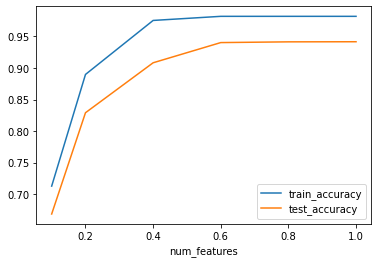

In [119]:
feature_num_df = feature_num(X, y)
feature_num_df.plot(x="num_features", y=["train_accuracy", "test_accuracy"])

Both test accuracy and train accuracy increase as number of features increase.However, the steepest increase occurs in the interval between 0.2 to 0.4.

## Q3

### Q3 (a)

Modify the partial code below

In [120]:
def hyperparameter(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for param in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        # Write your code here to calculate train_accuracy and test_accuracy for the current parameter value
        # ......
        clf = LogisticRegression(C=param).fit(X_train, y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)
        
        # add to result_list
        result_list.append((param, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

### Q3 (b)

Use the following code to plot the train and test accuracy for the different the parameters

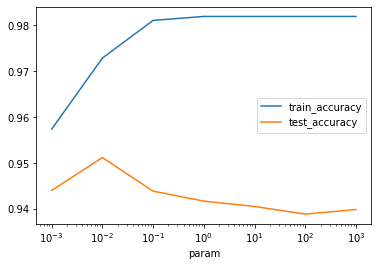

In [121]:
param_df = hyperparameter(X, y)
param_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True)

Training accuracy increases as C value increases. However, testing accuracy starts to decrease after 0.01 indicating that the model has become overfitted for the training set. It happened because lamba regulator has become very small.



## Q4

### Q4 (a)

Modify the partial code below

In [122]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

def corpus_count_words_filtered(file_list):
    tokenizer = RegexpTokenizer(r'\w+')
    word_counter = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data.lower())
            file_words = tokenizer.tokenize(file_data)
            file_words = [wordnet_lemmatizer.lemmatize(word) for word in file_words if not word in stop_words]
            word_counter.update(file_words)
    return word_counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [123]:
def tf_improved_data(file_list, num_words = 1000):

   # Put your code here
    # Make sure you update the variable features and targets below
    # Calculate word count in corpus
    news_cnt = corpus_count_words_filtered(file_list)
    nltk.download('stopwords')
    stop_words=set(stopwords.words('english'))
    tokenizer = RegexpTokenizer(r'\w+')
    wordnet_lemmatizer = WordNetLemmatizer()
    
    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    
    # Create a tf encoding of dataset based on the selected features (X)
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data.lower())
            file_words = tokenizer.tokenize(file_data)
            file_words = [wordnet_lemmatizer.lemmatize(word) for word in file_words if not word in stop_words]
            df_rows.append([file_words.count(word) if word in file_words else 0 for word in word_list])      
    X = pd.DataFrame(df_rows,index=[str(f) for f in file_list], columns = word_list) #index=[str(f) for f in file_list], 
    
    # Create a dataframe of targets (y)
    y = [get_target(get_topic_name(file_path)) for file_path in file_list]
    
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y

##using the improved function caused tf to o

### Q4 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [124]:
all_files1 = [pth for pth in Path(DATA_DIR).glob("**/*") if pth.is_file() and not pth.name.startswith(".")]
X_tf, y_tf = tf_improved_data(all_files1)
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X_tf, y_tf, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Train mean accuracy over 10 random splits: 0.9812745588340359
Train confidence interval over 10 random splits: [0.9808426040685311, 0.9817065135995408]
Test mean accuracy over 10 random splits: 0.9285166666666667
Test confidence interval over 10 random splits: [0.9272456043061137, 0.9297877290272196]


Binary encoding performs better than term frequency encoding due to the filters applied to both tokens and files which made these two encoding functions very similar to each other.

## Q5

### Q5 (a)

Modify the partial code below

In [128]:
##from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
def nb_random_mean_ci(X, y, num_tests):
    # train_results is a list of train accuracy results for the differrent random splits of the dataset
    train_results = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results = []
    
    # Write your code here
    #X, y = tf_improved_data(all_files)
    for i in range(num_tests):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,1000))
      # train NB
      ##clf = GaussianNB().fit(X_train, y_train)
      ##clf = BernoulliNB().fit(X_train, y_train)
      clf = MultinomialNB().fit(X_train, y_train)

      # predict on train and test set
      y_train_predict = clf.predict(X_train)
      y_test_predict = clf.predict(X_test)
      train_accuracy = accuracy_score(y_train, y_train_predict)
      test_accuracy = accuracy_score(y_test, y_test_predict)
      train_results.append(train_accuracy)
      test_results.append(test_accuracy)

    
    # calculate the train mean and the 95% confidence interval for the list of results
    train_mean = np.mean(train_results)
    train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean = np.mean(test_results)
    test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))
    
    # validate return types
    assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
    assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"
    
    return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

In [129]:
#for q5(b)

all_files3 = [pth for pth in Path(DATA_DIR).glob("**/*") if pth.is_file() and not pth.name.startswith(".")]
X,y = binary_improved_data(all_files3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Q5 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [130]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = nb_random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.9255483317853825
Train confidence interval over 10 random splits: [0.9246805173503205, 0.9264161462204445]
Test mean accuracy over 10 random splits: 0.9009333333333333
Test confidence interval over 10 random splits: [0.898280302167368, 0.9035863644992985]


Logistic Regression with frequency encoding function performs much better than Naive Bayes classifiers. It might be because of the function multinomialNB assumes that all tokens are independent and weighted the same for the classifier. Yet in fact, they were not weighted the same. Using Complement Naive Bayes might improve the result though.

## Q6

### Q6 (a)

Modify the partial code below

In [131]:
def binary_med_data(file_list, num_words = 1000):
    # Put your code here
    # Make sure you update the variable features and targets below
    # Make sure you update the variable features and targets below
    #stemmer = LancasterStemmer()
    #wordnet_lemmatizer = WordNetLemmatizer()
    # Calculate word count in corpus
    wordnet_lemmatizer = WordNetLemmatizer()
    nltk.download('stopwords')
    stop_words=set(stopwords.words('english'))
    tokenizer = RegexpTokenizer(r'\w+')
    def corpus_count_words_filtered(file_list):
        tokenizer = RegexpTokenizer(r'\w+')
        word_counter = Counter()
        for file_path in file_list:
          with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
              file_data = file.read()
              file_data = clean_file_text(file_data.lower())
              file_words = tokenizer.tokenize(file_data)
              file_words = [wordnet_lemmatizer.lemmatize(word) for word in file_words if not word in stop_words]
              word_counter.update(file_words)
        return word_counter
    news_cnt = corpus_count_words_filtered(file_list)
    #stop_words = set(stopwords.words('english'))
    
    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    
    # Create a binary encoding of dataset based on the selected features (X)
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data.lower())
            file_words = tokenizer.tokenize(file_data)
            file_words = [wordnet_lemmatizer.lemmatize(word) for word in file_words if not word in stop_words]

            #for word in file_words:
                 #word1=stemmer.stem(word)
                 #word2=wordnet_lemmatizer.lemmatize(word1)
                 #print("original word" + word)
                 #print("before filter"+word1)
                 #print("after filter"+word2)
            df_rows.append([1 if word2 in file_words else 0 for word2 in word_list]) 
        #df_rows.append([1 if word2 in file_words else 0 for word2 in word_list])      
    X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)
  
    # Create a dataframe of targets (y)
    y = [1 if get_topic_name(file_path) == "sci.med" else 0 for file_path in file_list]
    
    #Please remember to put index for your dataframe as the file name
    #For example: pd.DataFrame(data, index=[str(f) for f in file_list],columns=[])

    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y
  

In [132]:
#for q6 b
all_files4 = [pth for pth in Path(DATA_DIR).glob("**/*") if pth.is_file() and not pth.name.startswith(".")]
X6,y6 = binary_med_data(all_files4)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Q6 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [133]:

train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X6, y6, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.9997928127455882
Train confidence interval over 10 random splits: [0.9997419895977921, 0.9998436358933842]
Test mean accuracy over 10 random splits: 0.9987666666666668
Test confidence interval over 10 random splits: [0.9985475441229603, 0.9989857892103733]


Both mean train accuracy and Mean test accuracy are much higher than the multiclass logistic regression model in Q1 indicating that Logistic regression model performs better on binary classifications.


#Q7

##Q7(a)

use the following code cell to implement your feature encoding

In [134]:
def data_q7(file_list, num_words = 10000):
    nltk.download('stopwords')
    stop_words=set(stopwords.words('english'))
    tokenizer = RegexpTokenizer(r'\w+')
    wordnet_lemmatizer = WordNetLemmatizer()
    def corpus_count_words_filtered(file_list):
        tokenizer = RegexpTokenizer(r'\w+')
        word_counter = Counter()
        for file_path in file_list:
          with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
              file_data = file.read()
              file_data = clean_file_text(file_data.lower())
              file_words = tokenizer.tokenize(file_data)
              file_words = [wordnet_lemmatizer.lemmatize(word) for word in file_words if not word in stop_words]
              word_counter.update(file_words)
        return word_counter
    # Put your code here
    # Make sure you update the variable features and targets below
    #wordnet_lemmatizer = WordNetLemmatizer()
    #stemmer = LancasterStemmer()
    # Calculate word count in corpus
    #news_cnt = corpus_count_words(file_list)
    news_cnt=corpus_count_words_filtered(file_list)
    
    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    
    # Create a binary encoding of dataset based on the selected features (X)
    #tokenizer = RegexpTokenizer(r'\w+')
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data.lower())
            file_words = tokenizer.tokenize(file_data)
            file_words = [wordnet_lemmatizer.lemmatize(word) for word in file_words if not word in stop_words]
            #file_words = tokenizer.tokenize(file_data)
            #stop_words = set(stopwords.words('english'))
            #for word in file_words:
              #if word not in stop_words:
                #word1 = stemmer.stem(word)
                 #word2=wordnet_lemmatizer.lemmatize(word)
            
            df_rows.append([1 if word in file_words else 0 for word in word_list])      
    X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)
    
    # Create a dataframe of targets (y)
    y = [get_target(get_topic_name(file_path)) for file_path in file_list]
    

    #Please remember to put index for your dataframe as the file name
    #For example: pd.DataFrame(data, index=[str(f) for f in file_list],columns=[])
    
    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y

##Q7(b)

Use the following code cell to implement your model

In [135]:
def build_model_q7():
  MODELQ7=LogisticRegression(C=0.01)

  return MODELQ7

Code for evaluating p at k 

In [136]:
def calculate_average_precision_at_k(MODELQ7, all_files, training_files, testing_files,k=None):
  
  training_files = [str(f) for f in open(training_files,mode='r').read().splitlines()]
  testing_files = [str(f) for f in open(testing_files,mode='r').read().splitlines()]
  if k is None:
    k=len(testing_files)

  X, y = data_q7(all_files) 
  X['gt'] = y
  training = X.loc[training_files]
  X_train = training.loc[:,training.columns!='gt']
  y_train = training['gt'].values

  testing = X.loc[testing_files]
  X_test = testing.loc[:,testing.columns!='gt']
  y_test = testing['gt'].values

  MODELQ7.fit(X_train,y_train)
  y_pred = MODELQ7.predict(X_test)
  y_pred_prob = MODELQ7.predict_proba(X_test)
  confidences = np.max(y_pred_prob,axis=1)
  
  p_at_k = []
  rel_at_k = []
  confidence_order = np.argsort(confidences)
  for i in range(1,k+1):
    top_confidence = confidence_order[-i:]
    pred_top_i = y_pred[top_confidence]
    gt_top_i = np.array(y_test)[top_confidence]
    p_at_i = np.sum(pred_top_i == gt_top_i)/i
    rel_at_i = (pred_top_i[0] == gt_top_i[0])
    p_at_k.append(p_at_i)
    rel_at_k.append(rel_at_i)
  print('average precision at {} is {}'.format(k,np.dot(p_at_k,rel_at_k)/k))
  return np.dot(p_at_k,rel_at_k)/k

In [137]:
# Example usage:
#m = calculate_average_precision_at_k_baseline(LogisticRegression(C=1), all_files, 'training_files_Q7.txt', 'testing_files_Q7.txt')
C=build_model_q7()
m = calculate_average_precision_at_k(C, all_files, 'training_files_Q7.txt', 'testing_files_Q7.txt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
average precision at 4000 is 0.9167833857805611


##Q7(c)

Feature set: Most frequent 10000 words all convert to lowercase and lemmatized. Stop words are not in the set too.
Feature encoding: Improved binary encoding. words are all convert to lowercase and lemmatized. Stop words are stripped out too. These two steps are meant to match the feature set.
Classifer Used: Logistic regression classifer with c=0.01 as in Q3 b) test accuracy reached peak.

Feature set and encoding selected because stop words can be seen as noise for our assignment. By removing stop words, we are able to keep the noise low. By increasing the most frequent 1000 words to 10000 words, our model is able to study deeper on the patterns of the files. Logistic regression model choosed as it yields the best result for the above questions and it's computationally cheap. C parameter is set to 0.01, as I believe larger C will lead to overfitting to the model and smaller C will lead to underfitting. Words are lemmatized in order to consolidate words with same meanings to one keyword yet they are still actual words to fit the context.
